Best Mean Cross Validation Score is 0.9023351308126177 for VotingRegressor

Train score is 0.954370343397647

Test score is 0.8887082400299998

VotingRegressor(estimators=[('gbc',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=600,
                                                       n_iter_no_change=...
                             BaggingRegressor(base_estimator=SVR(C=100,
                                                                 cache_size=200,
                                                                 coef0=0.0,
                                                                 degree=1,
                                                                 epsilon=0.1,
                                                                 gamma=100,
                                                                 kernel='poly',
                                                                 max_iter=-1,
                                                                 shrinking=True,
                                                                 tol=0.001,
                                                                 verbose=False),
                                              bootstrap=False,
                                              bootstrap_features=False,
                                              max_features=1.0, max_samples=1.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False))],
                n_jobs=None, weights=None)
   
   
   
XGB
Best Mean Cross Validation Score is 0.9007594283911888
Best Mean Cross Validation Score is {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 0.1, 'n_estimators': 500, 'subsample': 0.8}
Train score is 0.9889975064645601
Test score is 0.889792236430764

# Results
- Models used with hyperparameters 
- Best Model parameters 
- Mean Cross validation score of Best model
- Test score of best model 
- Train score of best model 

## Data PreProcessing

In [3]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

### Load Datasets

In [4]:
# load dataset
# your code here
data = pd.read_csv('houseprice.csv')


### Types of variables



In [5]:
# we have an Id variable, that we should not use for predictions:

print('Number of House Id labels: ', len(data.Id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  1460
Number of Houses in the Dataset:  1460


#### Find categorical variables

In [6]:
# find categorical variables- hint data type = 'O'

categorical = [var for var in data.columns if data[var].dtype=='O']

print(f'There are {len(categorical)} categorical variables')

There are 43 categorical variables


#### Find temporal variables

In [7]:
# make a list of the numerical variables first= Hint data type != O
numerical = [var for var in data.columns if data[var].dtype!='O']

# list of variables that contain year information= Hint variable namme has Yr or 
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Find discrete variables

To identify discrete variables- numerical variables with less than 20 unique values 

In [8]:
# let's visualise the values of the discrete variables
discrete = [var for var in numerical if len(data[var].unique()) < 20 and var not in year_vars]

print(f'There are {len(discrete)} discrete variables')

There are 14 discrete variables


#### Continuous variables

In [9]:
# find continuous variables- hint numerical variables not in discrete and  year_years 
# Also remove the Id variable and the target variable SalePrice
# which are both also numerical

continuous = [var for var in numerical if var not in discrete and var not in [
    'Id', 'SalePrice'] and var not in year_vars]

print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 38 numerical and continuous variables


### Separate train and test set

In [10]:
# Let's separate into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((1314, 79), (146, 79))

**Now we will move on and engineer the features of this dataset. The most important part for this course.**

### Craete New Variables

Replace 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt  with time elapsed since YrSold
So YearBuilt = YrSold-YearBuilt. 

Similarly transform 'YearRemodAdd', 'GarageYrBlt.
After making transformation drop YrSold

In [11]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

In [12]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [13]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [14]:
year_vars.remove('YrSold')

In [15]:
# capture the column names for use later in the notebook
final_columns = X_train.columns
final_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Feature Engineering Pipeline

In [16]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [17]:
# import relevant modules for feature engineering
!pip install feature_engine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser

In [18]:
house_preprocess = Pipeline([
    
    # missing data imputation 
    ('missing_ind', mdi.AddNaNBinaryImputer(
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    ('imputer_cat', mdi.CategoricalVariableImputer(variables=categorical)),

    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.01,n_categories=6, variables=categorical+discrete)),
    ('categorical_enc', ce.MeanCategoricalEncoder(variables = categorical + discrete)),
     
    # Transforming Numerical Variables
    ('yjt', YeoJohnsonTransformer(variables = ['LotFrontage','MasVnrArea', 'GarageYrBlt'])),

    
    # discretisation and encoding
    ('treeDisc',  DecisionTreeDiscretiser(cv=2, scoring='neg_mean_squared_error',
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]})),

    # feature Scaling
    ('scaler', StandardScaler()),
    
    

])

In [19]:
house_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('missing_ind',
                 AddNaNBinaryImputer(variables=['LotFrontage', 'MasVnrArea',
                                                'GarageYrBlt'])),
                ('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['LotFrontage', 'MasVnrArea',
                                              'GarageYrBlt'])),
                ('imputer_cat',
                 CategoricalVariableImputer(variables=['MSZoning', 'Street',
                                                       'Alley', 'LotShape',
                                                       'LandContour',
                                                       'Utilities', '...
                                                    'Utilities', 'LotConfig',
                                                    'LandSlope', 'Neighborhood',
                                                    'Condition1', 'Condition2',
    

In [20]:
# Apply Transformations
X_train=house_preprocess.transform(X_train)
X_test=house_preprocess.transform(X_test)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

## Regression Models- Tune different models one by one

In [21]:
# Train a linear regression model, report the coefficients and model performance 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(lr_cv_scores))
print("mean cv",lr_cv_scores.mean())
#print("Mean Cross-validation scores: {}", cv_scores)
# Print Co-efficients
#print("lr.coef_:", lr.coef_)
#print("lr.intercept_:", lr.intercept_)

# Check test data set performance
#print("LR Performance Test: ", lr.score(X_train,y_train))

Mean Cross-validation scores: [ 8.68307098e-01 -1.35390689e+21  8.77382386e-01  8.98230703e-01
  8.92116636e-01]
mean cv -2.707813789327641e+20


In [22]:
# Train a SGD with GridSearchCV model, report the coefficients and model performance

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=10000, tol = 1e-6))
])
param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.5]}
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=5, return_train_score = True)


grid_sgd.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_sgd.best_score_))
print(grid_sgd.cv_results_['mean_train_score'])
# let's get the predictions
print()

#find best parameters
print('SGD parameters: ', grid_sgd.best_params_)

# Check test data set performance

print("grid_sgd Test Performance: ", grid_sgd.score(X_test,y_test))

Best Mean Cross-validation score: 0.8780
[ 8.96942299e-01  9.04016819e-01  8.93682950e-01 -9.49226245e+04]

SGD parameters:  {'sgd_reg__eta0': 0.05}
grid_sgd Test Performance:  0.8630843012752047


In [23]:
print(grid_sgd.cv_results_['mean_train_score'])

[ 8.96942299e-01  9.04016819e-01  8.93682950e-01 -9.49226245e+04]


In [24]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.5f}".format(grid_ridge.best_score_))

print()

# Check test data set performance

print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))

Best Mean Cross-validation score: 0.88415

Ridge Test Performance:  0.8731529205790176


In [25]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

# YOUR CODE HERE

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_lasso.best_score_))
print()


# Check test data set performance
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

Best Mean Cross-validation score: 0.8830

Lasso Test Performance:  0.877253397774493


In [26]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

#define a list of parameters
param_elasticnet = {'alpha':[0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10,100], 'l1_ratio' :[0.2,0.4,0.6,0.8]}

#grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5,verbose = 1, n_jobs = 2, scoring ='neg_root_mean_squared_error',return_train_score = True)
grid_elasticnet1 = GridSearchCV(elasticnet , param_elasticnet, cv=5,verbose = 1, n_jobs = -1, return_train_score = True)

#.fit(X_train, y_train)
grid_elasticnet1.fit(X_train, y_train)
# Mean Cross Validation Score

#print("with  scoring")
#print("Best Mean Cross-validation score: {:.4f}".format(grid_elasticnet.best_score_))
#print(grid_elasticnet.cv_results_['mean_test_score'].max())

#print("with out scoring")
print("Best Mean Cross-validation score: {:.4f}".format(grid_elasticnet1.best_score_))
print("cv_results_['mean_test_score'].max()", grid_elasticnet1.cv_results_['mean_test_score'].max())


#find best parameters
#print('grid_elasticnet parameters: ', grid_elasticnet.best_params_)


# Check test data set performance
print("grid_elasticnet Test Performance: ", grid_elasticnet1.score(X_test,y_test))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s


Best Mean Cross-validation score: 0.8841
cv_results_['mean_test_score'].max() 0.8840700291378194
grid_elasticnet Test Performance:  0.8730013625797747


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.2s finished


In [27]:
from sklearn.preprocessing  import PolynomialFeatures
poly = PolynomialFeatures()
lreg = LinearRegression()
from sklearn.pipeline import make_pipeline
#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,4)}

#apply polynomial regression in pipeline
pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1,return_train_score = True)
grid_poly.fit(X_train, y_train)

#find best parameters
#print('Mean test scores: ', grid_poly.cv_results_)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_poly.best_score_))

print('Best parameters: ', grid_poly.best_params_)

print('train score: ', grid_poly.score(X_train, y_train))
print('test score: ', grid_poly.score(X_test, y_test))

Best Mean Cross-validation score: -11113645668914992.0000
Best parameters:  {'polynomialfeatures__degree': 2}
train score:  0.9999955968564065
test score:  -1114665781096955.6


In [28]:
#print('Mean test scores: ', grid_poly.cv_results_)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

pipe_knn=Pipeline([ 
    ('scaler',MinMaxScaler()),
    ('knnreg', KNeighborsRegressor())
    
])
# define a list of parameters
param_knn = {'knnreg__n_neighbors': [5, 6,7]}
#param_knn = {'knnreg__n_neighbors': range(1,25)}

#apply grid search
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, n_jobs = -1, return_train_score=True)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))

#find best parameters
print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)

train score:  0.8516070137143069
test score:  0.7587863099604379
Best parameters:  {'knnreg__n_neighbors': 6}
Best cross-validation score: 0.78587417331835


In [30]:
#GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1,return_train_score = True)

SVM

In [31]:
from sklearn.svm import SVR
from sklearn.svm import SVC

In [32]:
ksvr = SVR()

In [33]:
param_grid = [ {'kernel': ['rbf'],
               'C': [  .01,1,10,100,10000],
               'gamma': [ 0.1, 5000]},
              #{'kernel': ['linear'],
              # 'C': [ 30000,20000]}
             ]

In [34]:
grid_search_SVM_Rbf = GridSearchCV(SVR(), param_grid, cv=5, n_jobs = -1,
                          return_train_score=True)
# {'C': 20000, 'kernel': 'linear'}
grid_search_SVM_Rbf.fit(X_train, y_train)
print('Best parameters: ', grid_search_SVM_Rbf.best_params_)
print('Best cross-validation score:', grid_search_SVM_Rbf.best_score_)

Best parameters:  {'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.015820900911724167


In [35]:
param_grid = [{'kernel': ['linear'],
               'C': [20000],
              # 'gamma':  [100,130,140,150],
               }
             ]
grid_search_SVMlinear = GridSearchCV(SVR(), param_grid, cv=5, n_jobs = -1,
                          return_train_score=True)
grid_search_SVMlinear.fit(X_train, y_train)
print('Best parameters: ', grid_search_SVMlinear.best_params_)
print('Best cross-validation score:', grid_search_SVMlinear.best_score_)

Best parameters:  {'C': 20000, 'kernel': 'linear'}
Best cross-validation score: 0.8867283288212725


#trying to find better values for poly svm

In [36]:
param_grid = [{'kernel': ['poly'],
               'C': [120,130,140],
               'gamma':  [130,140,150],
               'degree' : [1,2]
               }
             ]
grid_search_SVM_poly = GridSearchCV(SVR(), param_grid, cv=5, n_jobs = -1,
                          return_train_score=True)
grid_search_SVM_poly.fit(X_train, y_train)
print('Best parameters: ', grid_search_SVM_poly.best_params_)
print('Best cross-validation score:', grid_search_SVM_poly.best_score_)

Best parameters:  {'C': 130, 'degree': 1, 'gamma': 140, 'kernel': 'poly'}
Best cross-validation score: 0.8867277558552169


In [37]:
param_grid = [{'kernel': ['sigmoid'],
               'C': [  100,300,500],
               'gamma':  [ 0.1,0.2,0.3]             
               }             
             ]
grid_search_SVM_sig = GridSearchCV(SVR(), param_grid, cv=5,n_jobs = -1,
                          return_train_score=True)
grid_search_SVM_sig.fit(X_train, y_train)


#find best parameters
print('Best parameters: ', grid_search_SVM_sig.best_params_)
print('Best cross-validation score:', grid_search_SVM_sig.best_score_)

Best parameters:  {'C': 300, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best cross-validation score: 0.49630524800142617


In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree_param = {'max_depth': range(10,20) ,
               'min_samples_split': range(15,20)}
grid_dtree = GridSearchCV(dtree, dtree_param, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()
print("Best parameters of Decision Tree regressor is :{}".format(grid_dtree.best_params_))
print("test score of Decision Tree Regressor is {}".format(grid_dtree.score(X_test,y_test)))


Best Mean Cross-validation score: 0.77

Best parameters of Decision Tree regressor is :{'max_depth': 10, 'min_samples_split': 18}
test score of Decision Tree Regressor is 0.7798307941381377


In [39]:
# let's get the predictions
X_train_preds = grid_search_SVM_poly.predict(X_train)
X_test_preds = grid_search_SVM_poly.predict(X_test)

In [40]:
print("Best Mean Cross-validation score: {:.4f}".format(grid_search_SVM_poly.best_score_))

Best Mean Cross-validation score: 0.8867


In [41]:
# check model performance:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 603217752.7475367
train rmse: 24560.491704107568
train r2: 0.9033898149931888

test mse: 869520150.9286562
test rmse: 29487.62708202639
test r2: 0.8734712508944902


# # Ensemble Models

## Bagging

###  Bagging Tree 

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

In [43]:
bag_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [.01,.1,0.2,0.8,.9],
                 'n_estimators': [25,100,200,300]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True,n_jobs = -1 )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

In [44]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8735509123506588
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 200}
Train score is 0.9645200364875487
Test score is 0.8682427537114035


Best Mean Cross Validation Score is 0.8722938684887891
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.963722616694338
Test score is 0.8603296190869036


### Bagging Best Model

bag_svrP = BaggingClassifier(base_estimator=SVR(C = 150, degree = 1, gamma= 120, kernel= 'poly'), bootstrap=True, random_state=0, oob_score=True)

lr = bag_svrP.fit(X_train, y_train)

#lr = bag_svrP.fit(X_train, y_train)
cv_scores = cross_val_score(bag_svrP, X_train, y_train,cv = 5 , n_jobs = -1)

bag_svrP1 = BaggingClassifier(base_estimator=SVR(C = 150, degree = 1, gamma= 120, kernel= 'poly'), bootstrap=True, random_state=0)

In [45]:
#lr = bag_svrP1.fit(X_train, y_train, n_jobs = -1)

In [46]:
#lr = bag_svrP.fit(X_train, y_train)
#cv_scores = cross_val_score(bag_svrP1, X_train, y_train,cv = 5 , n_jobs = -1)

In [47]:
#print(cv_scores)

In [48]:
bag_svrP = BaggingRegressor(base_estimator=SVR(kernel ='poly'), bootstrap=True, random_state=0,n_jobs = -1)
param_grid = {
              'base_estimator__C' : [100,300,500],
              'base_estimator__degree' :   [1,2],
               'base_estimator__gamma' : [100,500,1000]       
                }
bag_svrP_grid1 = GridSearchCV(bag_svrP, param_grid,cv=5, return_train_score=True,n_jobs = -1)
bag_svrP_grid1.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=SVR(C=1.0,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma='scale',
                                                           kernel='poly',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                  

In [49]:
print(f'Best Mean Cross Validation Score is {bag_svrP_grid1.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_svrP_grid1.best_params_}')
print(f'Train score is {bag_svrP_grid1.score(X_train,y_train)}')
print(f'Test score is {bag_svrP_grid1.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.886091668145751
Best Mean Cross Validation Score is {'base_estimator__C': 100, 'base_estimator__degree': 1, 'base_estimator__gamma': 100}
Train score is 0.9020135535130496
Test score is 0.8784058207734156


Best Mean Cross Validation Score is 0.8860902782132741
Best Mean Cross Validation Score is {'base_estimator__C': 100, 'base_estimator__degree': 1, 'base_estimator__gamma': 100}
Train score is 0.9020135535130496
Test score is 0.8784058207734156

Best Mean Cross Validation Score is -0.013303324359417577
Best Mean Cross Validation Score is {'base_estimator__C': 10, 'base_estimator__degree': 1}
Train score is -0.005869270051933828
Test score is -0.0006717955856070379

## Pasting

### Pasting Tree

In [50]:
paste_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [.1,.01,.5,0.8],
                 'n_estimators': [300,500,1000]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True,n_jobs = -1)
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

In [51]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8689860079266183
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.5, 'n_estimators': 1000}
Train score is 0.9598424363441499
Test score is 0.8716042238173776


Best Mean Cross Validation Score is 0.85579891525468
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.977548776732943
Test score is 0.8644842558983825

### Pasting Best model

In [52]:
paste_svrP = BaggingRegressor(base_estimator=SVR(kernel = 'poly'), bootstrap=False, random_state=0)

param_grid = [{'base_estimator__C' : [ 10,50,100],
              'base_estimator__degree' :   [1,2],
               'base_estimator__gamma' :  [ 100,500]
              }  
             ]
paste_svrP_grid = GridSearchCV(paste_svrP, param_grid,cv=5, return_train_score=True, )
paste_svrP_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=SVR(C=1.0,
                                                           cache_size=200,
                                                           coef0=0.0, degree=3,
                                                           epsilon=0.1,
                                                           gamma='scale',
                                                           kernel='poly',
                                                           max_iter=-1,
                                                           shrinking=True,
                                                           tol=0.001,
                                                           verbose=False),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                 

In [53]:
print(f'Best Mean Cross Validation Score is {paste_svrP_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_svrP_grid.best_params_}')
print(f'Train score is {paste_svrP_grid.score(X_train,y_train)}')
print(f'Test score is {paste_svrP_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8867182407843186
Best Mean Cross Validation Score is {'base_estimator__C': 100, 'base_estimator__degree': 1, 'base_estimator__gamma': 100}
Train score is 0.9032153284566822
Test score is 0.8730788431320994


pasting
Best Mean Cross Validation Score is 0.886239817975301
Best Mean Cross Validation Score is {'base_estimator__C': 10, 'base_estimator__degree': 1, 'base_estimator__gamma': 100}
Train score is 0.9016336525800952
Test score is 0.8702806425506886

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfc =RandomForestRegressor(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [56]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8684018451123624
Best Mean Cross Validation Score is {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Train score is 0.9518111754018606
Test score is 0.8620153277926287


## Ada Boost (with decision tree)

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

In [58]:
adc_dtree =AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42)
adc_dtree_param = {
#              'base_estimator__criterion' : ["gini", "entropy"],
#              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [4,6,8],
              'n_estimators' : [100,150],
              'learning_rate' : [1.0,2,3],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

In [59]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8731237811314138
Best Mean Cross Validation Score is {'base_estimator__max_depth': 6, 'learning_rate': 2, 'n_estimators': 100}
Train score is 0.9623020124499386
Test score is 0.8698379324389934


Best Mean Cross Validation Score is 0.8731328245140333
Best Mean Cross Validation Score is {'base_estimator__max_depth': 6, 'learning_rate': 2, 'n_estimators': 100}
Train score is 0.9623020124499386
Test score is 0.8698379324389934

## 	Gradient Boost

In [60]:
from  sklearn.ensemble import GradientBoostingRegressor
gbc= GradientBoostingRegressor(random_state=42)
#{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600}
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [400,500,600],
              'learning_rate' : [.01,0.1],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,n_jobs = -1 )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [61]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8980661915129733
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 600}
Train score is 0.9883608839701025
Test score is 0.8912110485390645


## Extra-Trees 

In [62]:
from  sklearn.ensemble import ExtraTreesClassifier
from  sklearn.ensemble import ExtraTreesRegressor


In [63]:
etc= ExtraTreesRegressor(random_state=42,n_jobs = -1 )
etc_param = { 
    'n_estimators': [ 500,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,10,50]
    
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,n_jobs = -1  )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=-1,
                                           oob_score=False, random_state=42,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_gri

In [64]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8806569897251457
Best Mean Cross Validation Score is {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 500}
Train score is 0.9999955856332952
Test score is 0.8673099070827246


## 	XGBoost( best)

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor


In [67]:
from  xgboost import XGBRegressor
xgbc= XGBRegressor(random_state=42,early_stopping_rounds=2,n_jobs = -1 )
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [500,800,1000],
              'learning_rate' : [.05,0.1],
               'min_child_weight' : [.1,.5,1],
                'subsample':[0.8,0.9]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,n_jobs = -1 )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=2, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_c...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [68]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9007594283911888
Best Mean Cross Validation Score is {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 0.1, 'n_estimators': 500, 'subsample': 0.8}
Train score is 0.9889975064645601
Test score is 0.889792236430764


Best Mean Cross Validation Score is 0.8981999648181408
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Train score is 0.979396879296572
Test score is 0.8776048030903614

# Predicting

In [125]:
classifiers={
             'knn':grid_knn,
 	      'poly':grid_poly,
	      'elastic':grid_elasticnet1,
	      'lasso':grid_lasso,
	      'ridge':grid_ridge,
	      'lsgd':grid_sgd,		
	     'svrRbf':grid_search_SVM_Rbf,
        'SVMlinear':grid_search_SVMlinear,
	   #  'svrl':grid_search_SVMlinear,	
             'svrp':grid_search_SVM_poly,
             'svrsig':grid_search_SVM_sig,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'bag_svrP':bag_svrP_grid1,
            'paste_dtree1': paste_dtree1_grid,
             'paste_svrP': paste_svrP_grid,
             'rfc': rfc_grid,          
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
	     'etc': etc_grid,
             'xgbc': xgbc_grid}



In [126]:
classifiers.keys()

dict_keys(['knn', 'poly', 'elastic', 'lasso', 'ridge', 'lsgd', 'svrRbf', 'SVMlinear', 'svrp', 'svrsig', 'dtree', 'bag_dtree1', 'bag_svrP', 'paste_dtree1', 'paste_svrP', 'rfc', 'adc_dtree', 'gbc', 'etc', 'xgbc'])

In [127]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [128]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [129]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df.head(6)

,model,mean,std
19,xgbc,0.900759,0.009268
17,gbc,0.898066,0.025025
7,SVMlinear,0.886728,0.009445
8,svrp,0.886728,0.009445
14,paste_svrP,0.886718,0.009453
12,bag_svrP,0.886092,0.007799


In [130]:
accuracy_df.to_csv('accuracy_df_reg.csv')

In [131]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

# Predictions

In [132]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)


In [133]:
pred

,knn,poly,elastic,lasso,ridge,lsgd,svrRbf,SVMlinear,svrp,svrsig,dtree,bag_dtree1,bag_svrP,paste_dtree1,paste_svrP,rfc,adc_dtree,gbc,etc,xgbc
0,191316.666667,3.253103e+12,263655.245673,259870.500399,263521.453398,272629.926376,162055.963669,254817.964755,254819.805172,244163.328444,286141.333333,232192.761471,257278.157049,237621.630743,255256.464800,248263.043037,245304.347826,260515.844579,254483.242,260701.609375
1,115813.833333,-2.941955e+11,130804.224834,130781.591974,130814.334756,137554.655137,159054.859889,134840.328363,134838.932365,137463.600484,150666.727273,140839.729029,134080.917670,142412.197804,135404.545940,142752.851594,148469.444444,137308.774440,138715.486,139275.031250
2,134341.666667,-8.745137e+11,120690.792966,119038.654463,120609.227953,121724.748340,158512.365277,124147.988185,124147.385715,131170.327111,114437.500000,119787.322172,124618.148971,116311.843175,124553.700341,129188.570052,128667.921875,111925.890590,130819.522,109314.570312
3,204785.500000,-9.833320e+11,217482.466827,218046.405524,217544.683668,222833.215344,168689.732761,218872.267022,218871.402487,230843.638602,269860.333333,233293.508732,218950.605004,230615.004592,218818.445883,204502.489293,224484.265823,214952.861573,200781.596,211810.921875
4,100983.333333,2.180281e+11,92806.958086,93064.727174,92768.214995,93733.209996,121363.514758,91225.189475,91223.581158,116920.390837,69297.666667,96500.372422,92358.083719,96750.607354,91647.163215,106554.726851,109475.000000,94081.899390,95538.022,92989.203125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,164733.333333,-4.407789e+11,116972.646187,113606.275501,116774.462221,110991.656707,154952.541148,113551.343468,113549.292967,134329.581575,142985.465116,137132.883724,113329.755331,138460.018243,113540.367258,139782.602666,127233.333333,129791.463817,142756.466,136083.000000
142,191333.333333,5.523534e+12,296546.892963,305214.113021,296886.362973,269926.999997,162059.157191,271694.003377,271692.526619,234706.834738,219170.833333,205622.453310,267814.222549,210848.472894,272217.314214,219676.306428,241174.193548,240283.100798,219783.202,228175.593750
143,131970.833333,2.532215e+11,157801.719452,157218.165674,157858.018382,165794.349708,159937.313697,153125.966628,153125.745024,132304.005305,147490.000000,141653.120623,154697.728096,144322.952094,153093.040190,144531.959182,148650.000000,152758.308715,146343.926,150209.390625
144,138066.666667,3.761256e+12,137983.490545,133945.629510,137826.737065,134744.278113,162022.523806,145494.941756,145495.962188,131999.062559,142985.465116,135528.189091,145050.664910,137037.045917,145530.629010,134178.471383,143116.363636,125006.289805,140584.274,138688.406250


In [134]:
pred.to_csv('pred_reg.csv')

# correlations

Text(0.5, 1, 'Correlation of the test set label prediction between models')

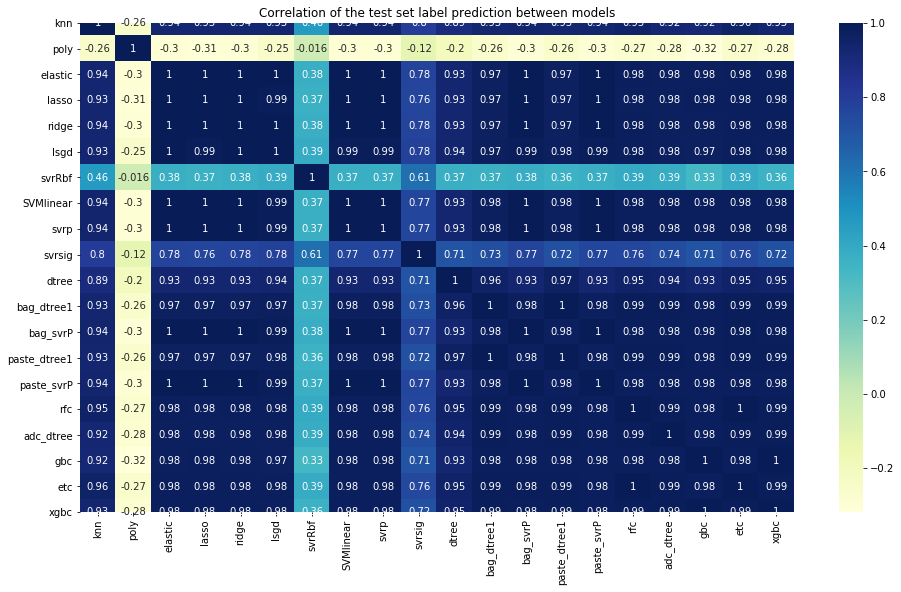

In [135]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))
g = sns.heatmap(pred.corr(), annot=True, cmap='YlGnBu', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [136]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [137]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 15))

Top Absolute Correlations
poly  svrRbf          0.015904
      svrsig          0.122178
      dtree           0.201010
      lsgd            0.252946
knn   poly            0.256153
poly  bag_dtree1      0.261649
      paste_dtree1    0.262004
      etc             0.266132
      rfc             0.268318
      adc_dtree       0.283229
      xgbc            0.284196
      elastic         0.296741
      paste_svrP      0.297024
      ridge           0.297143
      SVMlinear       0.297490
dtype: float64


In [138]:
get_top_abs_correlations

<function __main__.get_top_abs_correlations(df, n)>

# Voting top 5

In [139]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor

## Voting top cv best

In [141]:
vclf1 = VotingRegressor(estimators=
                              [#('bag_svrP', bag_svrP_grid1.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
                               ('xgbc', xgbc_grid.best_estimator_),
                               ('svrp', grid_search_SVM_poly.best_estimator_),
                               ('SVMlinear', grid_search_SVMlinear.best_estimator_),
                                ('paste_svrP',paste_svrP_grid.best_estimator_)
                              ] )

vclf1_cv = cross_val_score(vclf1,X_train,y_train,cv=5,  n_jobs = -1 )
vclf1.fit(X_train,y_train)

VotingRegressor(estimators=[('gbc',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

In [142]:
print("best mean cv score for VotingRegressor:",vclf1_cv.mean())

best mean cv score for VotingRegressor: 0.9023351308126177


### best

In [163]:
print(f'Best Mean Cross Validation Score is {vclf1_cv.mean()}')
#print(f'Best Mean Cross Validation Score is {sclf1.best_params_}')
print(f'Train score is {vclf1.score(X_train,y_train)}')
print(f'Test score is {vclf1.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9023351308126177
Train score is 0.954370343397647
Test score is 0.8887082400299998


## Voting corr

In [158]:
vclf2 = VotingRegressor(estimators=
                              [('poly',grid_poly.best_estimator_),
     ('svrRbf',grid_search_SVM_Rbf.best_estimator_),
            ('gbc',gbc_grid.best_estimator_),
                              ], )

vclf2_cv = cross_val_score(vclf2,X_train,y_train,cv=5,  n_jobs = -1 )
vclf2.fit(X_train,y_train)
print("best mean cv score for VotingRegressor:",vclf2_cv.mean())

best mean cv score for VotingRegressor: -1234849518994964.8


In [162]:
vclf3 = VotingRegressor(estimators=
                              [('svrsig',grid_search_SVM_sig.best_estimator_),
     ('svrRbf',grid_search_SVM_Rbf.best_estimator_),
            ('gbc',gbc_grid.best_estimator_),
                              ], )

vclf3_cv = cross_val_score(vclf3,X_train,y_train,cv=5,  n_jobs = -1 )
vclf3.fit(X_train,y_train)
print("best mean cv score for VotingRegressor:",vclf3_cv.mean())

best mean cv score for VotingRegressor: 0.6389456673414127


# Stacking

## Stacking top cv

In [144]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier

In [145]:
sclf1 = StackingRegressor(estimators=
                              [#('bag_svrP', bag_svrP_grid1.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
                            #   ('xgbc', xgbc_grid.best_estimator_),
                               ('svrp', grid_search_SVM_poly.best_estimator_),
                               ('SVMlinear', grid_search_SVMlinear.best_estimator_),
                                ('paste_svrP',paste_svrP_grid.best_estimator_)
                              
                              ], final_estimator=(xgbc_grid.best_estimator_))
#sclf1_param = {
 #             'base_estimator__C': [100], 'base_estimator__degree': [1], 'base_estimator__gamma': 100
  #           }
#sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
#sclf1_grid.fit(X_train,y_train)

In [146]:
sclf1_cv = cross_val_score(sclf1,X_train,y_train,cv=5,  n_jobs = -1 )
sclf1.fit(X_train,y_train)

StackingRegressor(cv=None,
                  estimators=[('gbc',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
            

In [147]:
print("best mean cv score for StackingRegressor:",sclf1_cv.mean())

best mean cv score for StackingRegressor: 0.8684222346767229


In [148]:
print(f'Best Mean Cross Validation Score is {sclf1_cv.mean()}')
#print(f'Best Mean Cross Validation Score is {sclf1.best_params_}')
print(f'Train score is {sclf1.score(X_train,y_train)}')
print(f'Test score is {sclf1.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8684222346767229
Train score is 0.9416318184303138
Test score is 0.8888777470262385


Best Mean Cross Validation Score is 0.8418512469334931
Train score is 0.8933576086337154
Test score is 0.8785013636451742

## stacking least corr

In [149]:
sclf2 = StackingRegressor(estimators=
                              [
     ('svrRbf',grid_search_SVM_Rbf.best_estimator_),
            ('gbc',gbc_grid.best_estimator_)
                              ], final_estimator=(grid_poly.best_estimator_),cv = 5)
#sclf2_param = {
            #  'final_estimator__degree' : [1,2,3]
             # 'stack_method':['auto', 'predict_proba']
#             }
#sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
#sclf2_grid.fit(X_train,y_train)

In [150]:
sclf2_cv = cross_val_score(sclf2,X_train,y_train,cv=5,  n_jobs = -1 )
sclf2.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('svrRbf',
                               SVR(C=10000, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma=0.1, kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('gbc',
                               GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
              

In [151]:
print(f'Best Mean Cross Validation Score is {sclf2_cv.mean()}')
#print(f'Best Mean Cross Validation Score is {sclf1.best_params_}')
print(f'Train score is {sclf2.score(X_train,y_train)}')
print(f'Test score is {sclf2.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8987931247729136
Train score is 0.9851821078742296
Test score is 0.8903872032385729
